# Neural Network Classification: MNIST Dataset

이 노트북에서는 **MNIST 손글씨 숫자 (0~9)** 데이터셋을 활용하여 신경망 분류 모델을 학습합니다.

## 목표
1. 데이터 불러오기 및 전처리
2. Neural Network 모델 정의
3. 학습 및 학습 곡선 확인
4. 성능 평가 및 예측 시각화


In [11]:
# matplotlib 폰트 깨짐 현상 해결
import matplotlib.font_manager as fm
fm.fontManager.ttflist
[f.name for f in fm.fontManager.ttflist]

import matplotlib as mpl
mpl.rcParams['font.family'] = 'NanumGothic'
from matplotlib import rc
# NanumGothic 사용
rc('font', family='NanumGothic')
rc('font', family='Malgun Gothic')

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

## 1. 데이터 불러오기

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("원본 데이터 shape:", X_train.shape, y_train.shape)

원본 데이터 shape: (60000, 28, 28) (60000,)


## 2. 데이터 전처리

In [4]:
# 0~255 픽셀값 → 0~1 정규화
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# (28,28) → (784,) 벡터화
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# One-hot 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("전처리 후 shape:", X_train.shape, y_train.shape)

전처리 후 shape: (60000, 784) (60000, 10)


## 3. 모델 정의

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(784,)),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

## 4. 모델 컴파일

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## 5. 모델 학습

In [7]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8411 - loss: 0.5658 - val_accuracy: 0.9507 - val_loss: 0.1645
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9637 - loss: 0.1241 - val_accuracy: 0.9631 - val_loss: 0.1213
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9772 - loss: 0.0777 - val_accuracy: 0.9702 - val_loss: 0.0982
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9845 - loss: 0.0524 - val_accuracy: 0.9708 - val_loss: 0.0972
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9886 - loss: 0.0373 - val_accuracy: 0.9731 - val_loss: 0.0863
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9923 - loss: 0.0276 - val_accuracy: 0.9762 - val_loss: 0.0843
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9937 - loss: 0.0207 - val_accuracy: 0.9790 - val_loss: 0.0829
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9945 - loss: 0.0180 - val_accu

## 6. 학습 곡선 확인

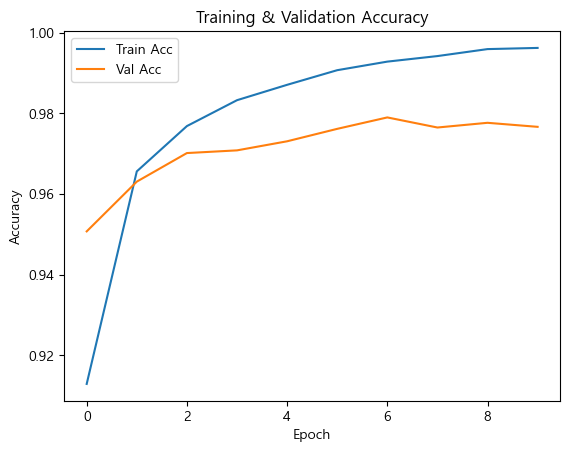

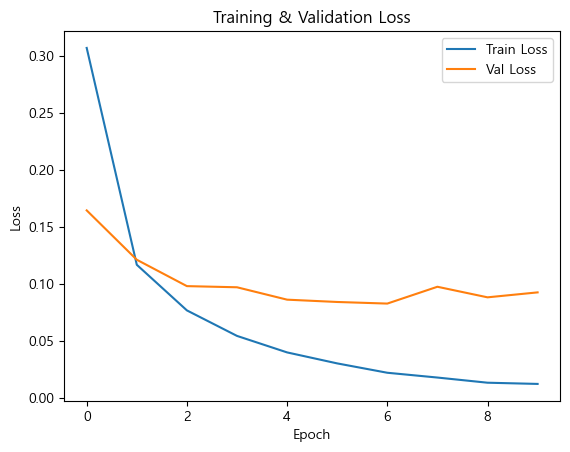

[진단] 최저 val_loss epoch = 7
[진단] 최근 3epoch 평균 정확도 격차(train-val) = 1.85 %p
[진단] 최저점 이후 loss 추세로 본 과적합 징후 = False
→ 과적합 징후는 약함(또는 무시 가능).


In [16]:
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()

plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

train_acc = np.array(history.history['accuracy'])
val_acc   = np.array(history.history['val_accuracy'])
train_loss = np.array(history.history['loss'])
val_loss   = np.array(history.history['val_loss'])

# 1) 최저 val_loss 시점 이후, train_loss는 하락·val_loss는 상승하는지 체크
best_idx = int(np.argmin(val_loss))
post = slice(best_idx+1, None)
overfit_trend = (post.stop is not None) and (
    (train_loss[post][-1] < train_loss[best_idx]) and
    (val_loss[post][-1]   > val_loss[best_idx])
)

# 2) 마지막 3에폭 평균 격차로 정량 판단
k = min(3, len(val_acc))
gap = float(np.mean(train_acc[-k:] - val_acc[-k:])) * 100  # percentage points

print(f"[진단] 최저 val_loss epoch = {best_idx+1}")
print(f"[진단] 최근 {k}epoch 평균 정확도 격차(train-val) = {gap:.2f} %p")
print(f"[진단] 최저점 이후 loss 추세로 본 과적합 징후 = {overfit_trend}")

if gap <= 2 and not overfit_trend:
    print("→ 과적합 징후는 약함(또는 무시 가능).")
elif gap <= 4 or overfit_trend:
    print("→ 경미~중간 수준 과적합: EarlyStopping/Dropout/학습률 조정 권장.")
else:
    print("→ 과적합 뚜렷: 정규화 강화·에폭 단축·모델 단순화 필요.")

## 7. 모델 평가

In [9]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 정확도: {acc:.3f}")

테스트 정확도: 0.980


## 8. 예측 예시 시각화

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


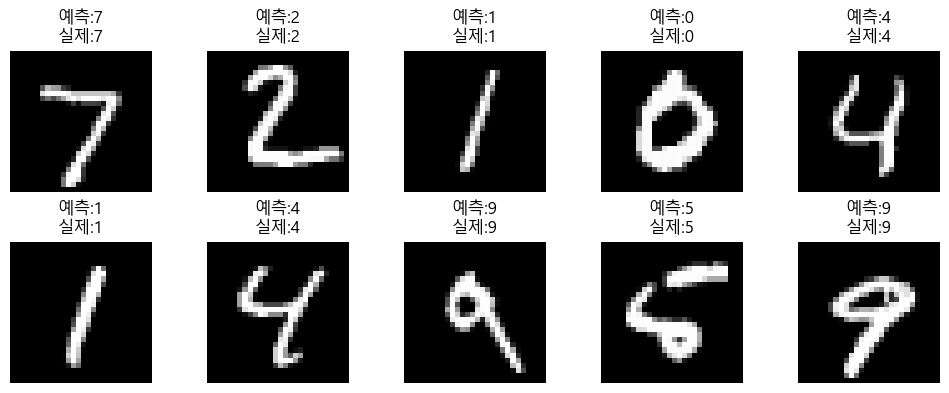

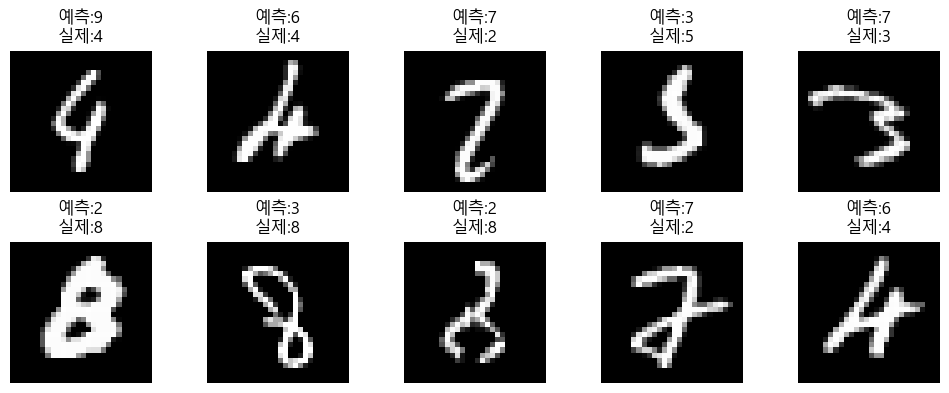

In [15]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

idx = 0
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i+idx].reshape(28,28), cmap="gray")
    plt.title(f"예측:{y_pred_classes[i+idx]}\n실제:{y_true[i+idx]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

failed = y_pred_classes != y_true
failed_idx = np.where(failed)[0]
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[failed_idx[i]].reshape(28,28), cmap="gray")
    plt.title(f"예측:{y_pred_classes[failed_idx[i]]}\n실제:{y_true[failed_idx[i]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

## 생각해보기
- Training/Validation Graph 에서 과적합(overfitting) 징후가 보이나?

GPT를 활용하여 과적합 진단코드를 삽입하여 수행한결과 아래와같이 과적합이 경미하게 나옴 <Br>
[진단] 최저 val_loss epoch = 7<Br>
[진단] 최근 3epoch 평균 정확도 격차(train-val) = 1.85 %p<Br>
[진단] 최저점 이후 loss 추세로 본 과적합 징후 = False<Br>
→ 과적합 징후는 약함(또는 무시 가능).